In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# パーセプトロン
def perceptron(x):
    W  = np.array([1,2])
    b = 3
    y = np.dot(x,W) + b
    return 1if y >= 0 else 0
    
x = np.array([1, 0])
perceptron(x)

1

[ 0.003 -0.003 -0.001]


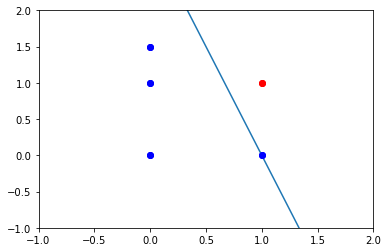

In [6]:
class Perceptron(object):
    
    def __init__(self, eta=0.001, n_iter=1000): # 1000
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w = np.zeros(1+X.shape[1]) # W[0]　がバイアス．
        self.errors = []
        
        for _ in range(self.n_iter):
            error = 0
            for x, target in zip(X,y):
                dif = target - self.predict(x)
                update = dif * self.eta
                self.w[1:] += update * x 
                self.w[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self.w
        
    
    def net_input(self, X):
        return np.dot(X, self.w[1:]) +self.w[0] # ここがミスってた
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
X = np.array([[0,0],[1,0],[0,1],[1,1], [0,1.5]])
# X = np.array([[0,0], [1,0], [1,1], [0, 1]])
y = np.array([1,1,1,0,1])
# y = np.array([0, 1, 0, 1])

colors = ["r", "b"]
for p, q in zip(X,y):
    plt.plot(p[0],p[1],"o", c=colors[q])
    plt.xlim([-1,2])
    plt.ylim([-1,2])
    
pct = Perceptron()
print(pct.fit(X,y))
    
_x = np.arange(-1,2,0.1)
_w = pct.w
_y = [(_w[0]+_w[1]*x)/(-_w[2]) for x in _x]
plt.plot(_x, _y)
for p, q in zip(X,y):
    plt.plot(p[0],p[1],"o", c=colors[q])
    plt.xlim([-1,2])
    plt.ylim([-1,2])